# Oscillations and Periodicity

In this notebook, I visually examine the illusion appearances and determine average periods across participants

In [1]:
import csv
import matplotlib.pyplot as pl
import numpy as np

In [20]:
def peakPlotter (csv_filename, title):
    
    with open('./Data/'+csv_filename+'.csv', 'rt', encoding='utf8') as csvfile:
        peak_array = csv.reader(csvfile, delimiter = ',')
    
        data_dict = {}

        i_s = []
        i = 1
        
        for participant in peak_array:
            participant.pop(0)
            participant = list (map (float, participant))
            data_dict[str(i)] = {}
            data_dict[str(i)]['data']= participant
            data_dict[str(i)]['y-vals'] = [i]*len(participant)
            data_dict[str(i)]['title'] = 'Participant '+str(i)
            i_s.append(str(i))
            i += 1
                
        # Plots and Period
        Periods = []
        Per_Diffs = []
        plot_colors = ['ro', 'bo', 'go', 'co', 'ko', 'yo', 'mo', 'ro']
        
        pl.figure(figsize=(5,5))
        
        i = 0
        for participant in data_dict:
            pl.plot (data_dict[i_s[i]]['data'], data_dict[i_s[i]]['y-vals'], plot_colors[i])
            period = (max(data_dict[i_s[i]]['data'])-min(data_dict[i_s[i]]['data']))/(len(data_dict[i_s[i]]['data'])-1)
            Periods.append(period)
                        
            j = 0
            for timepoint in data_dict[i_s[i]]['data']:
                if j < len(data_dict[i_s[i]]['data'])-1:
                    per_diff = data_dict[i_s[i]]['data'][j+1] - timepoint
                    Per_Diffs.append(per_diff)
                    j += 1
                
            i += 1
        
        pl.ylim(0.5, len(data_dict)+0.5)
        pl.xlim([0, max(data_dict[i_s[1]]['data'])+1])
        
        # Average Period Plots
        Average_Period = round(np.mean(Periods), 3)
        print ('Average Period = ' + str(Average_Period))
        print ('Stdev = ' + str(np.std(Periods)))
        
        for xc in np.arange(0, max(data_dict[i_s[0]]['data'])+1, Average_Period):
            period_line = pl.axvline(x=xc, color='k', linestyle='--')
            
        
#        pl.legend([period_line],['Average Period'], bbox_to_anchor=(1.05, 1), loc=2)
        
        pl.title(title,fontsize=14)
        pl.xlabel('Scintillation Time (s)',fontsize=14)
        pl.ylabel('Subject #', fontsize=14)
        pl.tick_params(axis='both', which='major', labelsize=12)
        pl.tick_params(axis='both', which='minor', labelsize=12)
        pl.tight_layout()
        # Big Font #
        #pl.title('Periodicity of Illusion Appearance', size = 22)
        #pl.xlabel('Time of Appearance (s)', size = 20)
        #pl.ylabel('Participant #', size = 22)
        
        pl.savefig('./Figures/Period_Plots/'+csv_filename+'_plot.png',dpi=500)
        pl.show()
        
        # CDF Histogram of Period Distributions
        values, base = np.histogram(Per_Diffs, bins=8)
        pl.figure(figsize=(5,5))
        pl.plot(base[:-1], values, 'k', linewidth=2.0)
        pl.title(title+ ' distribution',fontsize=14)
        pl.xlabel('Scintillation Period (s)',fontsize=14)
        pl.ylabel('Count',fontsize=14)
        pl.tick_params(axis='both', which='major', labelsize=12)
        pl.tick_params(axis='both', which='minor', labelsize=12)
        pl.tight_layout()
        pl.savefig('./Figures/Period_Plots/'+csv_filename+'_dist.png',dpi=500)
        pl.show()
        
        pl.figure(figsize=(5,5))
        pl.plot(base[:-1], np.cumsum(values),'k', linewidth=2.0)
        pl.title(title+' CDF',fontsize=14)
        pl.xlabel('Scintillation Period (s)', fontsize=14)
        pl.ylabel('Cumulative Count', fontsize=14)
        pl.tick_params(axis='both', which='major', labelsize=12)
        pl.tick_params(axis='both', which='minor', labelsize=12)
        pl.tight_layout()
        pl.savefig('./Figures/Period_Plots/'+csv_filename+'_cdf.png', dpi=500)
        pl.show()

Average Period = 1.083
Stdev = 0.0695795127444135


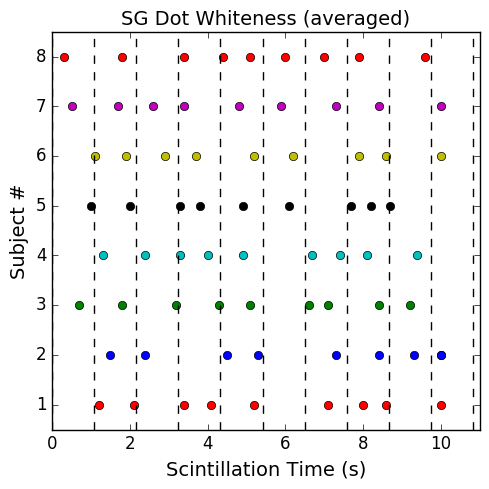

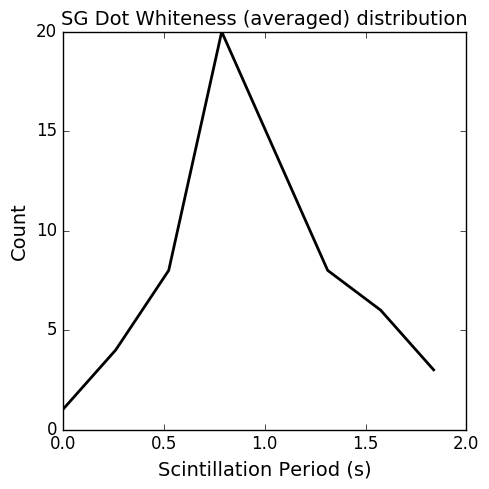

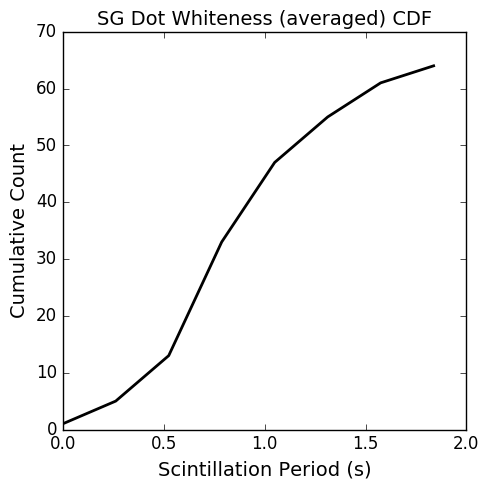

In [21]:
peakPlotter('period_data_blackness', 'SG Dot Whiteness (averaged)')

Average Period = 1.347
Stdev = 0.11323525167642011


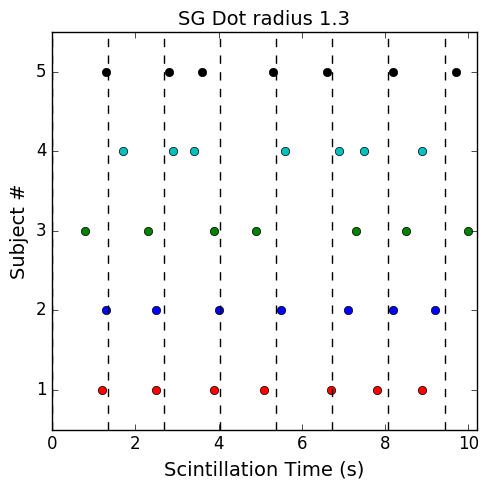

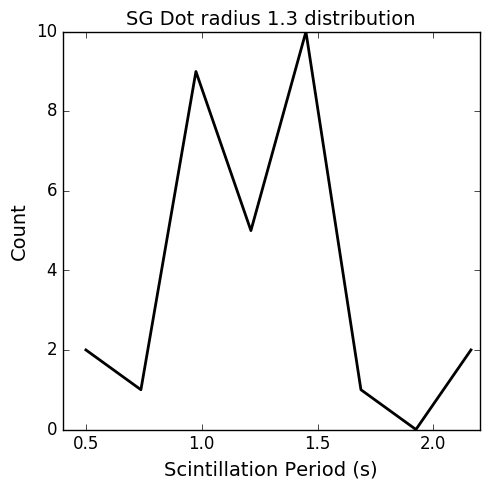

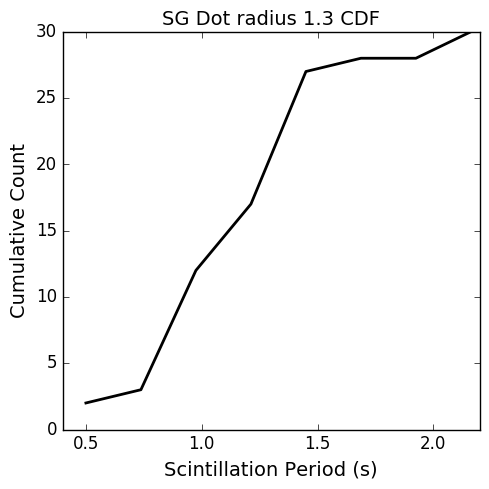

In [22]:
peakPlotter('period_data_size13', 'SG Dot radius 1.3')

Average Period = 1.815
Stdev = 0.1820714145603312


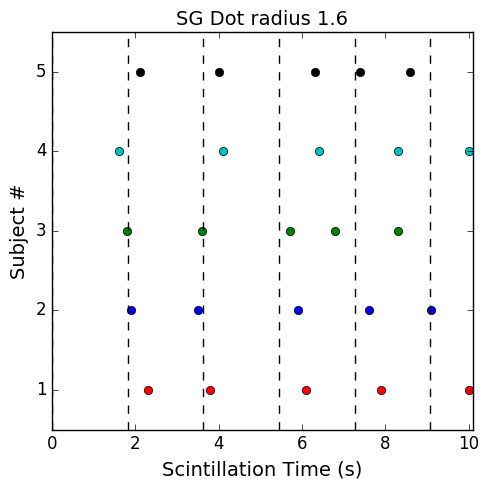

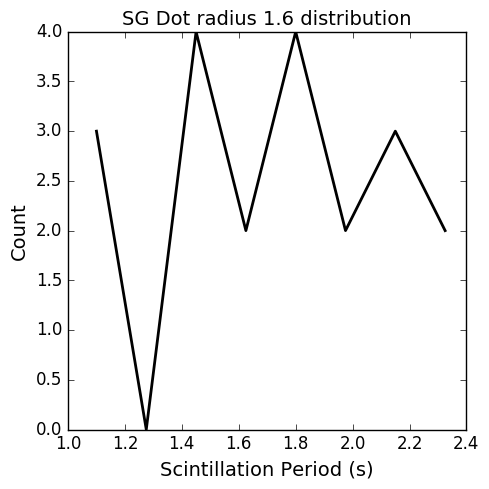

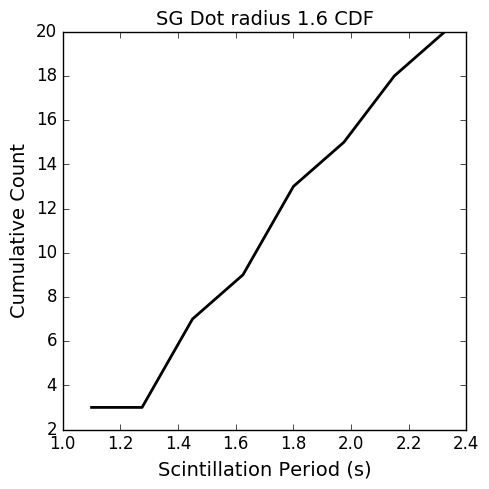

In [23]:
peakPlotter('period_data_size16', 'SG Dot radius 1.6')

Average Period = 1.31
Stdev = 0.1701633202413363


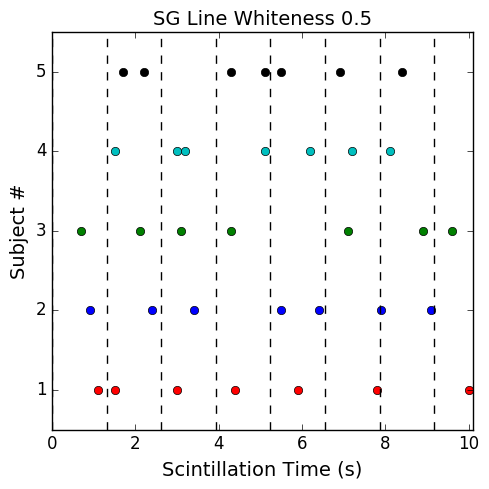

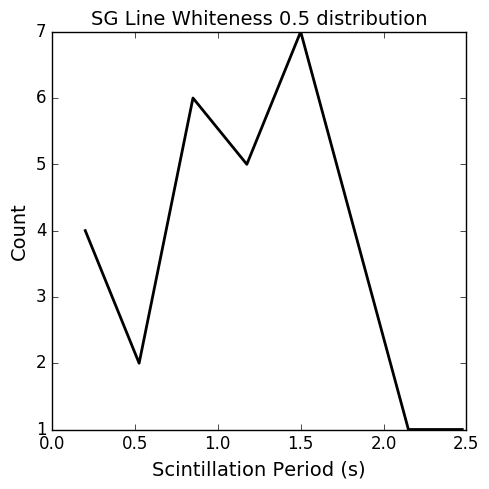

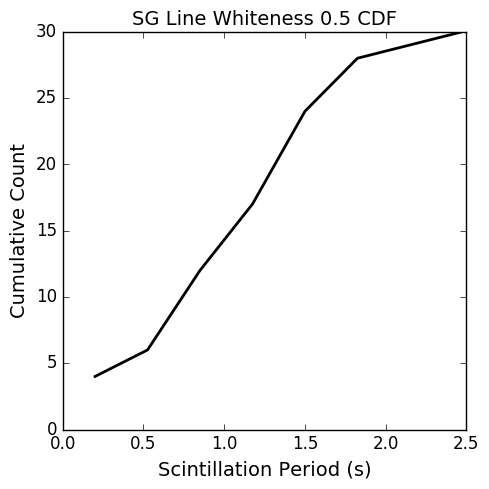

In [24]:
peakPlotter('period_data_SGline05', 'SG Line Whiteness 0.5')

Average Period = 1.316
Stdev = 0.2624195114697076


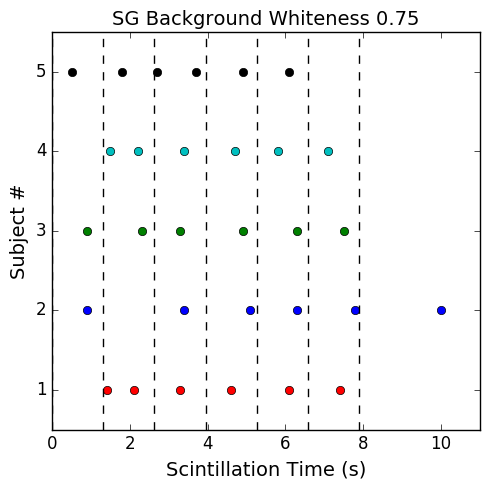

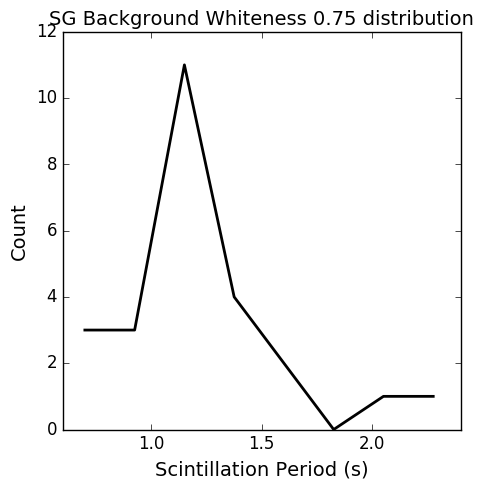

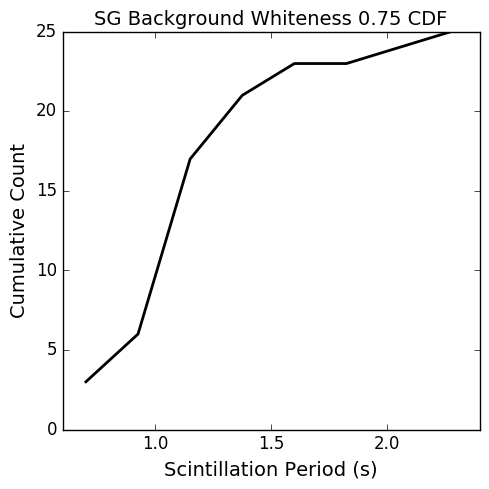

In [25]:
peakPlotter('period_data_SG_BG025', 'SG Background Whiteness 0.75')